# <font color=blue>Assignments for "Visualization with Seaborn"</font>

In this assignment you will continue to make some plots on the [Coronavirus Source Data](https://ourworldindata.org/coronavirus-source-data). For plotting you will use Seaborn library. 

1. Plot a line plot with seaborn for total deaths four the four countries (Spain, France, Germany, Italy) after April 1, 2020.

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

covid_data = pd.read_csv('owid-covid-data.csv', parse_dates=["date"], low_memory=False)

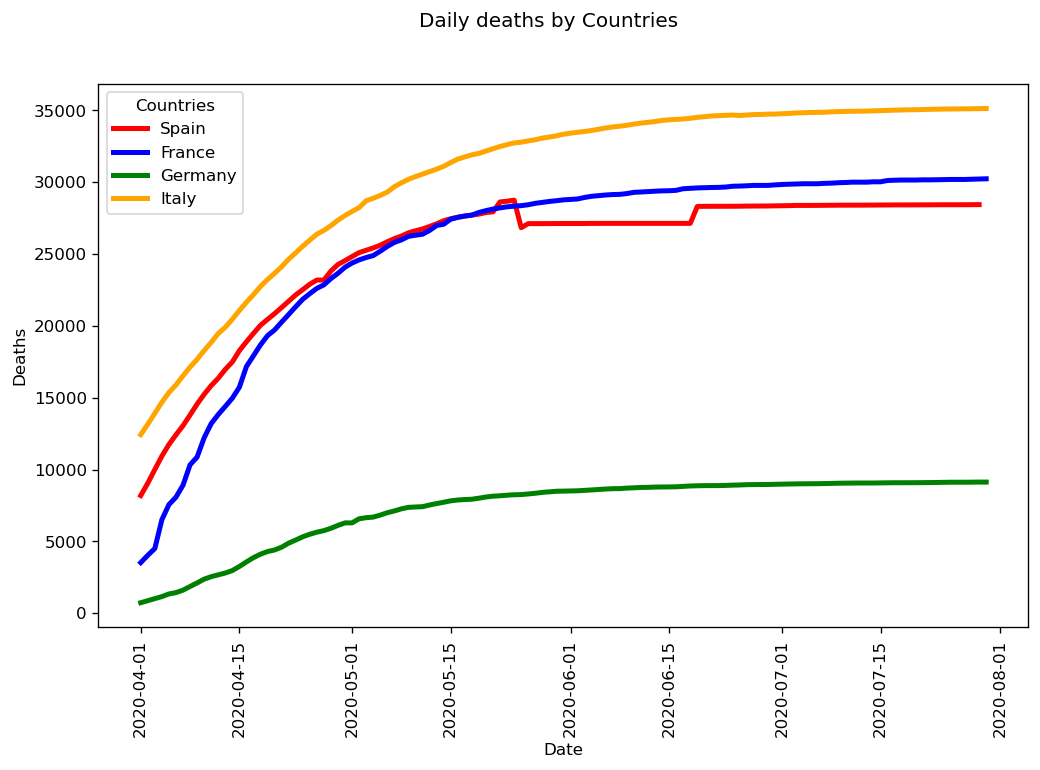

In [47]:

#from datetime import datetime
#startFrom=datetime(2020,4,1)
#print(startFrom)

#display(covid_data)

countries=["Spain","France","Germany","Italy"]
colors=["red","blue","green","orange"]

fig=plt.figure(figsize=(10,6),dpi=120)
fig.suptitle("Daily deaths by Countries")


plotNo=1


for country in countries:
    covid_data_filtered=covid_data[ ( covid_data.location==country ) &  (covid_data.date>="2020-04-01" )  ]    #.isin(["Spain","France","Germany","Italy"])
    #covid_data_filtered
    #total_deaths=covid_data_filtered.groupby("location").agg({"total_deaths":["sum"]})
    #total_deaths
    #plt.subplot(2,2,plotNo)
    #plt.title("Total deatsh for {}".format(country),color=colors[plotNo-1])
    sns.lineplot(x=covid_data_filtered.date,y="total_deaths",data=covid_data_filtered,linewidth=3,color=colors[plotNo-1],label=countries[plotNo-1])
    
    plotNo+=1
    
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.xticks(rotation=90)
plt.legend(title="Countries",loc=2)
    
import warnings
warnings.filterwarnings("ignore")

2. Plot a bar plot with seaborn for average death number that compares continents.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

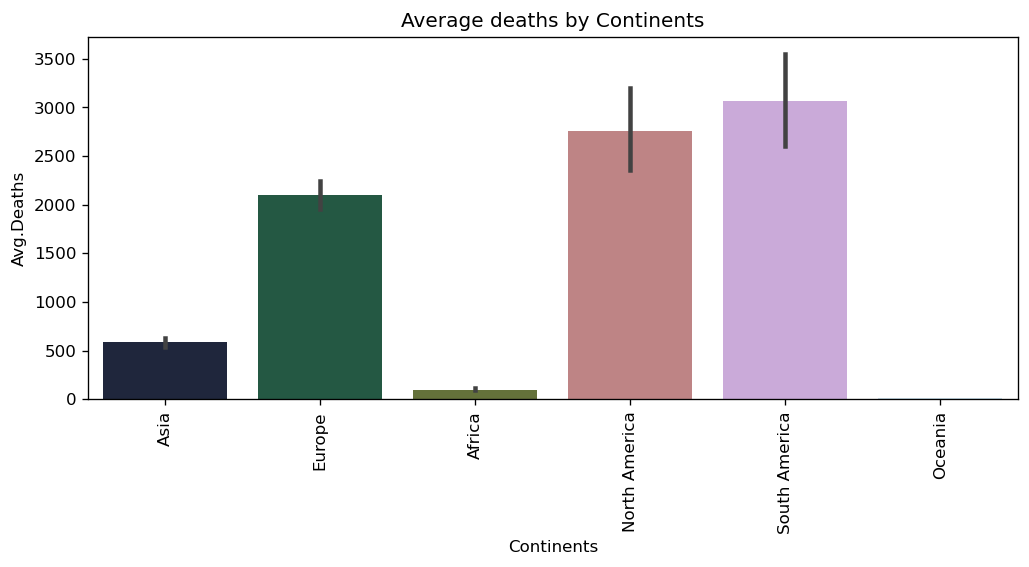

In [66]:
#continent_avg=covid_data.groupby("continent").agg({"total_deaths":["mean"]})
#display(covid_data)

fig=plt.figure(figsize=(10,4),dpi=120)
sns.barplot(x="continent",y="total_deaths",data=covid_data,palette="cubehelix")

plt.title("Average deaths by Continents")
plt.xlabel("Continents")
plt.ylabel("Avg.Deaths")
plt.xticks(rotation=90)





3. Plot a histogram for daily deaths for any country you choose. Make four subplots for different bin counts and `kde` arguments.

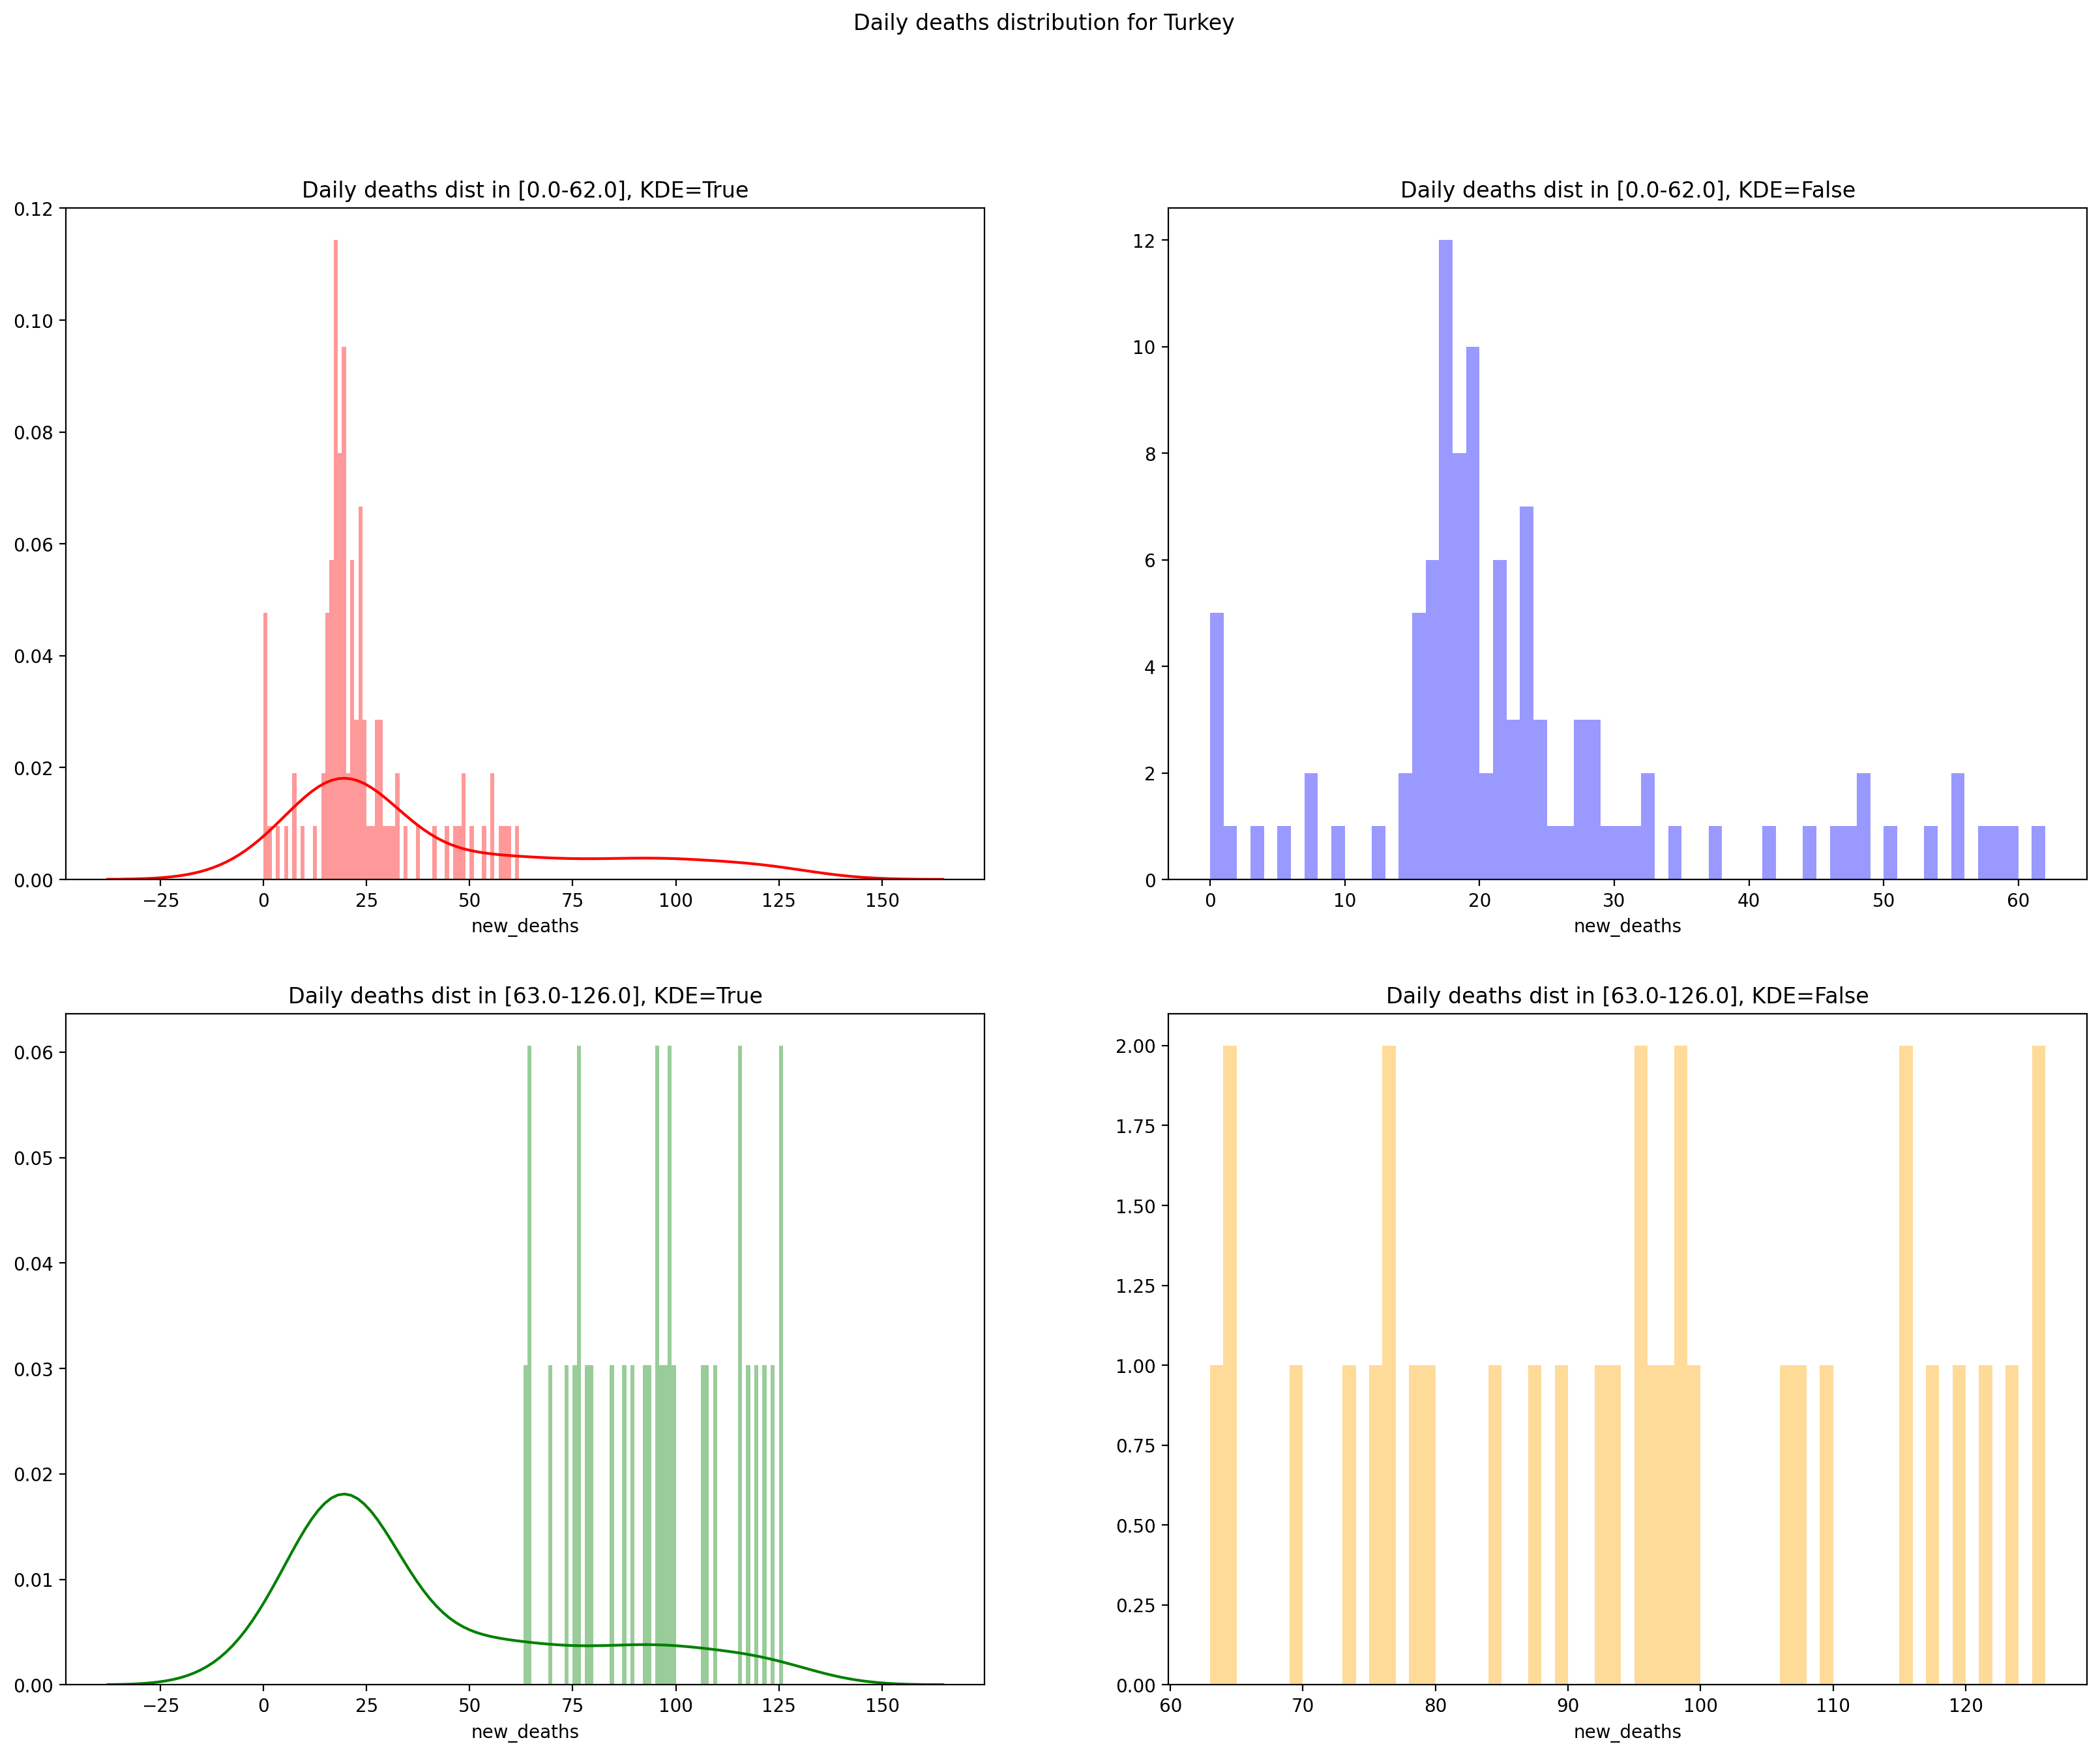

In [92]:
import numpy as np 


# c=covid_data.groupby("location")

# for k,v in c:
#     print(k)

country="Turkey" #input("Enter a country")

covid_data_by_country=covid_data[covid_data.location==country]
#display(covid_data)
fig=plt.figure(figsize=(20,15),dpi=200)
fig.suptitle("Daily deaths distribution for {}".format(country))

#sns.distplot(covid_data_by_country.new_deaths.dropna())

#get the bins for the country hist
(a,xbins)=np.histogram(covid_data_by_country.new_deaths.dropna())
  

colors=["red","blue","green","orange"]
kdes=[True,False,True,False]
bin1=np.arange(xbins[0], int(xbins[-1]/2))    # left half of the bin range
bin2=np.arange(int(xbins[-1]/2),xbins[-1])   # right half of the bin range.. 
bins=[bin1,bin1,bin2,bin2]    

for plotNo in range(1,5):
    kde=kdes[plotNo-1]
    bin=bins[plotNo-1]
    color=colors[plotNo-1]
    
    plt.subplot(2,2,plotNo)
    sns.distplot(covid_data_by_country.new_deaths.dropna(),bins=bin,color=color,kde=kde)
    plt.title("Daily deaths dist in [{}-{}], KDE={}".format(bin[0],bin[-1],kde))       
  

    
    

4. Create a figure and three subplots containing boxplot, violin plot and swarm plot for daily deaths of two countries you choose.

Text(0.5, 1.0, 'Violin')

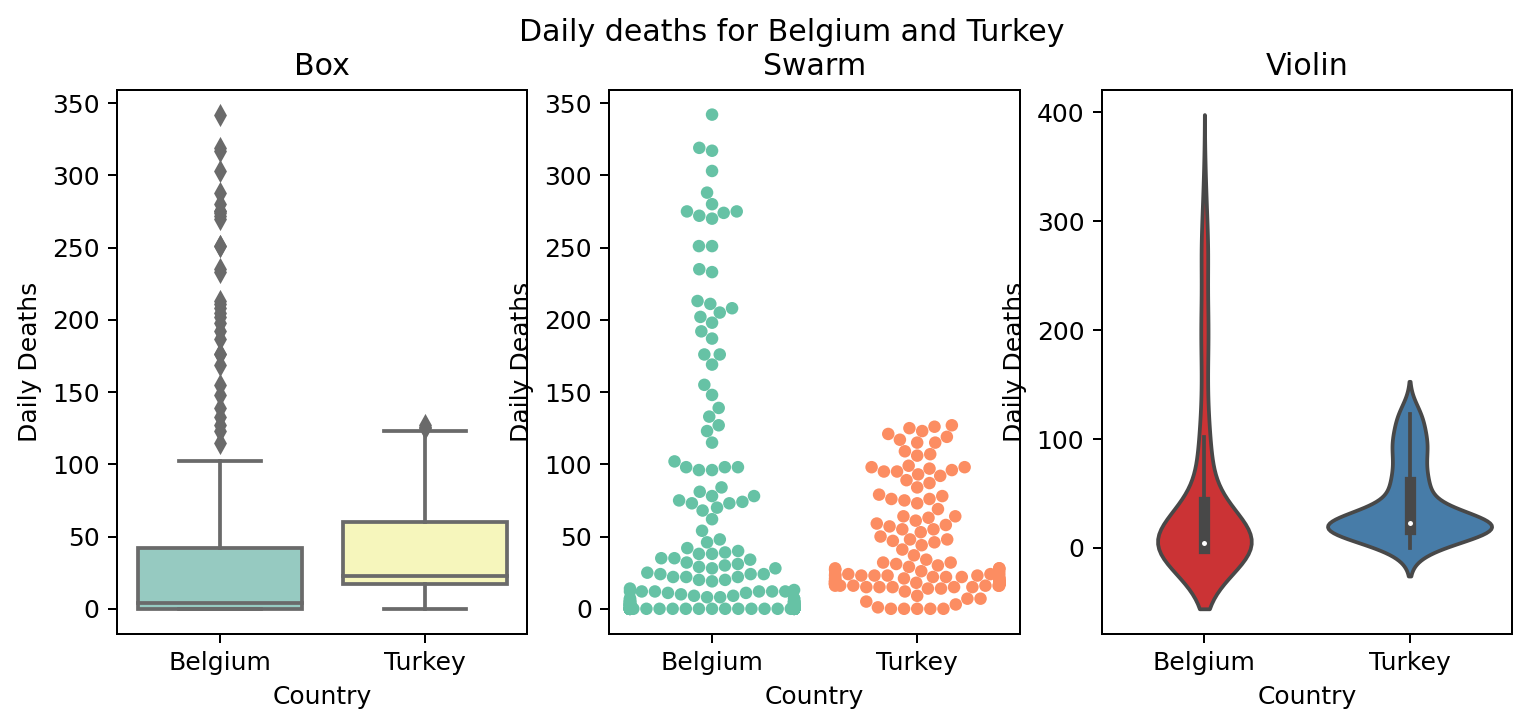

In [96]:
country1="Belgium" #imput("Enter country 1")
country2="Turkey" #imput("Enter country 2")

covid_data_by_two_countries=covid_data[covid_data.location.isin([country1,country2])]

fig=plt.figure(figsize=(10,4),dpi=180)
fig.suptitle("Daily deaths for {} and {}".format(country1,country2))

plt.subplot(1,3,1)
sns.boxplot(x="location",y="new_deaths",data=covid_data_by_two_countries,palette="Set3")
plt.xlabel("Country")
plt.ylabel("Daily Deaths")
plt.title("Box")

plt.subplot(1,3,2)
sns.swarmplot(x="location",y="new_deaths",data=covid_data_by_two_countries,palette="Set2")
plt.xlabel("Country")
plt.ylabel("Daily Deaths")
plt.title("Swarm")


plt.subplot(1,3,3)
sns.violinplot(x="location",y="new_deaths",data=covid_data_by_two_countries,palette="Set1")
plt.xlabel("Country")
plt.ylabel("Daily Deaths")
plt.title("Violin")



